# importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



# 1 Reading the aviation dataset

In [2]:
#reading the csv file using pandas
df=pd.read_csv('AviationData.csv',encoding='latin1')
#viewing the first ten rows of the dataframe
df.iloc[:,:31].head(10)

C:\Users\HomePC\AppData\Local\Temp\ipykernel_13588\2735014867.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('AviationData.csv',encoding='latin1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


## 1.1 checking the number of columns and rows in the dataset

In [3]:
#checking shape of the dataframe
df.shape

(88889, 31)

The dataset has 88889 rows and 31 columns

## 1.2 checking the descriptive statistics for numerical columns in the dataset

In [4]:
#checking descriptive statistics of the numerical columns
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


The total fatal injuries,total serious injuries,total minor injuries and total injured columns are highly skewed with the median values significantly different from the mean and the maximum values are significantly larger than the 75th percentile.
The number of engines column summary also indicates the presence of outliers since the max value is very large compared to the 75th percentile.

## 1.3 summary of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

>The dataset has 88889 rows and 31 colums.
>The dataset has a mixture of categorical and numerical columns.
>The dataset has some columns with missing values 

# 2 cleaning the dataset

In [6]:
#creating the year and months column from the event date column
df['Event.Year']=[int(i.split('-')[0]) for i in df['Event.Date']]#creating the event year column
df['Event.Month']=[int(i.split('-')[1]) for i in df['Event.Date']]#creating the mevent month column
print(df['Event.Year'].value_counts())#checking for the values in the event year column
print(df['Event.Month'].value_counts())#checking for the values in the event month column

Event.Year
1982    3593
1983    3556
1984    3457
1985    3096
1986    2880
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1995    2309
1994    2257
1998    2226
2000    2220
1999    2209
1996    2187
1997    2148
2003    2085
2001    2063
2005    2031
2002    2020
2007    2016
2004    1952
2008    1893
2006    1851
2011    1850
2012    1835
2010    1786
2009    1783
2018    1681
2016    1664
2017    1638
2019    1624
2022    1607
2015    1582
2013    1561
2021    1545
2014    1535
2020    1392
1979       2
1962       1
1981       1
1977       1
1974       1
1948       1
Name: count, dtype: int64
Event.Month
7     10698
8      9986
6      9561
5      8514
9      8346
4      7248
10     6982
3      6686
11     5538
2      5285
12     5060
1      4985
Name: count, dtype: int64


## 2.1 checking for duplicates

In [7]:
#checking for duplicates
df.duplicated().sum()

0

The dataset had no duplicates

## 2.2 checking for missing values in the columns and their percentage

In [8]:
#checking for percentage of null values per column
(df.isna().sum()/len(df))*100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.601570
Airport.Name              40.708074
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.554748
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.982990
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

There is presence of many columns with missing values;some with more than 50% missing values,some with more than 10% but less than 50% missing values and some with less than 10% missing values

### 2.2.1 dropping columns with many missing values

In [9]:
#droping columns with many missing values
df.drop(['Latitude','Longitude','Airport.Code','Airport.Name','Aircraft.Category','FAR.Description','Schedule', 'Air.carrier'],axis=1,inplace=True)
df.isna().sum()


Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
Event.Year                    0
Event.Month                   0
dtype: int64

we see that there is still columns with missing values but the columns which we dropped are not there anymore.

### 2.2.2 dropping rows for columns with less missing values

In [10]:
# droping entire rows for columns with less than 10% missing values
df.dropna(axis=0,subset=['Location','Country','Injury.Severity','Aircraft.damage','Make','Model','Number.of.Engines','Engine.Type','Amateur.Built','Purpose.of.flight','Total.Uninjured','Weather.Condition','Report.Status','Registration.Number'],inplace=True)    

In [11]:
#checking for missing values in the new dataframe
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries       6925
Total.Serious.Injuries     6878
Total.Minor.Injuries       6577
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight     16573
Report.Status                 0
Publication.Date          11940
Event.Year                    0
Event.Month                   0
dtype: int64

we can see that there is still some columns with missing values but the columns in which we dropped the entire rows now have no missing values

### 2.2.3 filling the columns with missing values with appropriate placeholders

In [12]:
# replacing null values
df['Broad.phase.of.flight'].fillna(df['Broad.phase.of.flight'].mode()[0],inplace=True)# broad phase of flight with mode
df['Publication.Date'].fillna('unknown',inplace=True)# publication date with 'unknown'
df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].median(),inplace=True)#total fatal injuries with median 
df['Total.Serious.Injuries'].fillna(df['Total.Serious.Injuries'].median(),inplace=True)#total serious injuries with median
df['Total.Minor.Injuries'].fillna(df['Total.Minor.Injuries'].median(),inplace=True)#total minor injuries with median



I replaced the numerical columns with the median because the the data in the columns were skewed.for the publication date i replaced with the string unknown because I could not fill it with the mode since the entries are unique.

In [13]:
#checking for missing values in the new dataframe
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
Event.Year                0
Event.Month               0
dtype: int64

as we can see there are no more missing values in our data

In [14]:
#changing values in categorical columns to lower case
df=df.apply(lambda x: x.str.lower() if x.dtype=='object' else x)

I did this for uniformity in the categorical columns

## 2.3 checking for extranous values

In [15]:
#viewing value counts for the categorical columns
for col in df.columns:
    if df[col].dtype=='object':
        print(df[col].value_counts(),'\n')

Event.Id
20001214x45071    3
20001212x19172    3
20001213x32935    2
20020917x04883    2
20001212x17570    2
                 ..
20001213x30008    1
20001213x29922    1
20001213x29932    1
20001213x29916    1
20221109106272    1
Name: count, Length: 69367, dtype: int64 

Investigation.Type
accident    68876
incident     1176
Name: count, dtype: int64 

Accident.Number
era22la119    2
era22la103    2
cen22la149    2
cen22la346    2
sea87la080    1
             ..
chi90la020    1
bfo90la005    1
bfo90la004    1
atl90la018    1
cen23la033    1
Name: count, Length: 70048, dtype: int64 

Event.Date
1984-06-30    25
1982-05-16    25
1983-08-05    24
1982-05-01    23
1982-07-09    23
              ..
2010-03-16     1
2010-03-19     1
2010-03-29     1
2010-04-20     1
2022-11-09     1
Name: count, Length: 13935, dtype: int64 

Location
anchorage, ak      490
fairbanks, ak      218
miami, fl          205
houston, tx        203
albuquerque, nm    175
                  ... 
ludell, ks           1

In [16]:
df.to_csv('cleaned aviation data.csv')

# 3 perfoming Exploratory Data Analysis

## 3.1 viewing the distribution of the type of investigation

Investigation.Type
accident    68876
incident     1176
Name: count, dtype: int64


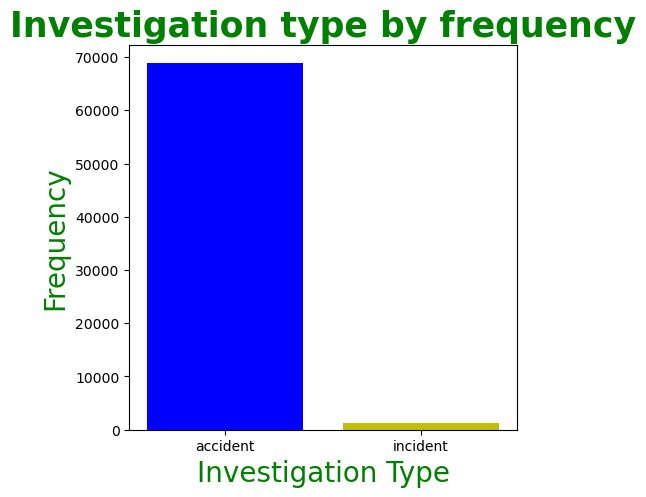

In [29]:
dim_IT=df['Investigation.Type'].value_counts()#defining the series to use
fig, ax=plt.subplots(figsize=(5,5))
ax.bar(dim_IT.index,height=dim_IT.values,color=['b','y'])# plotting the bar graph
ax.set_xlabel('Investigation Type',color='g',fontsize=20,)#labeling the x axis
ax.set_ylabel('Frequency',color='g',fontsize=20)#labeling the y axis
ax.set_title('Investigation type by frequency',color='g',fontsize=25,fontweight='bold');#setting the title
print(df['Investigation.Type'].value_counts())

## 3.2 viewing the spread of numerical columns 

Text(0.5, 1.0, 'Histogram of the number of engines')

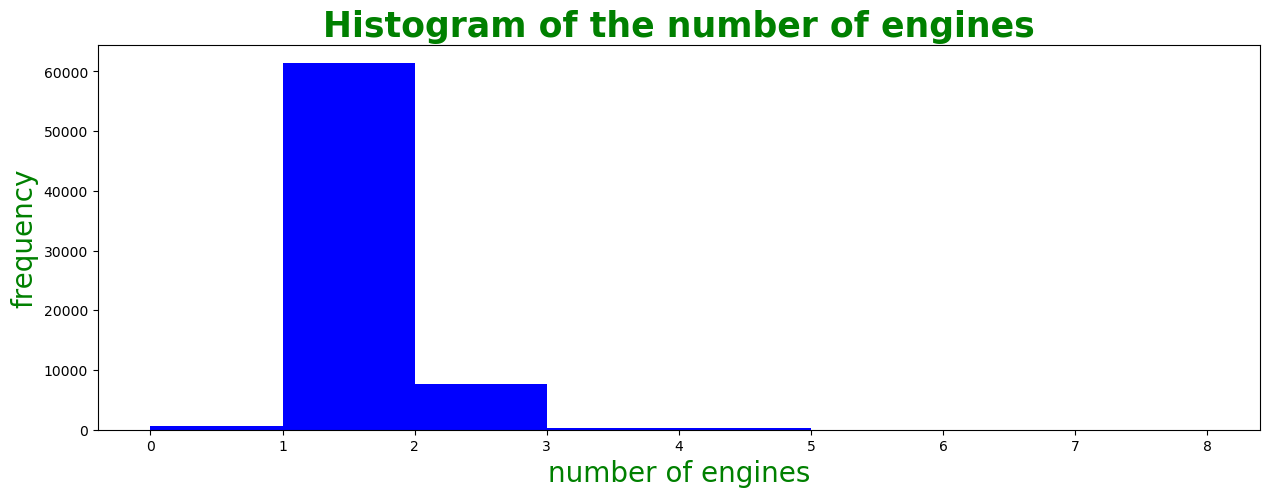

In [45]:
# histogram of the number of engines
fig, ax=plt.subplots(figsize=(15,5))
ax.hist(df['Number.of.Engines'],bins=8,color='b')#plotting the histogram
ax.set_xlabel('number of engines',color='g',fontsize=20)#labeling the x axis
ax.set_ylabel('frequency',color='g',fontsize=20)#labeling the y axis
ax.set_title('Histogram of the number of engines',color='g',fontsize=25,fontweight='bold')#setting the title

## 3.3 viewing the number of accidents and incidents against different categories in the categorical columns

Amateur.Built
no     63152
yes     6900
Name: count, dtype: int64


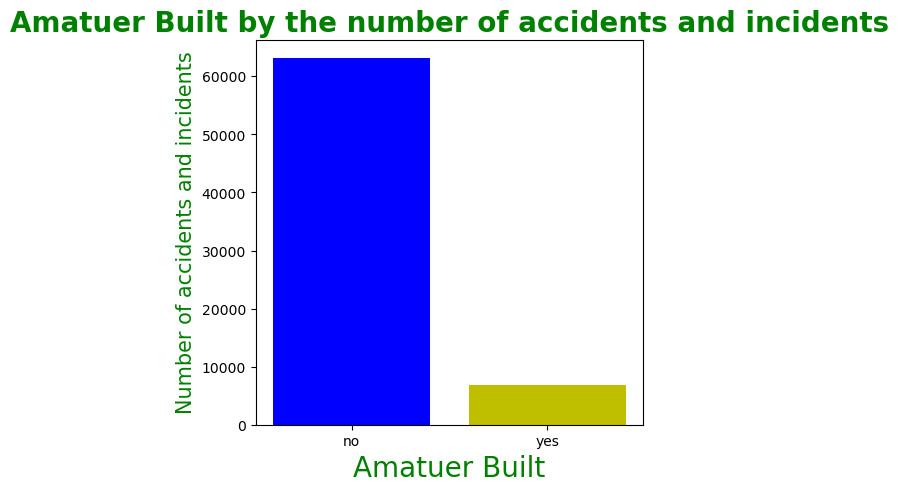

In [46]:
#ploting bar graph of amatuer built by the number of accidents
dim_AB=df['Amateur.Built'].value_counts()#defining the series to use
fig, ax=plt.subplots(figsize=(5,5))
ax.bar(dim_AB.index,height=dim_AB.values,color=['b','y'])#plotting the bar graph
ax.set_xlabel('Amatuer Built',color='g',fontsize=20)#labeling the x axis
ax.set_ylabel('Number of accidents and incidents',fontsize=15,color='g')#labeling the y axis
ax.set_title('Amatuer Built by the number of accidents and incidents',color='g',fontsize=20,fontweight='bold');#setting the title
print(df['Amateur.Built'].value_counts())


Engine.Type
reciprocating    62954
turbo shaft       2712
turbo prop        2431
turbo fan          919
unknown            621
turbo jet          407
electric             4
none                 2
lr                   1
unk                  1
Name: count, dtype: int64


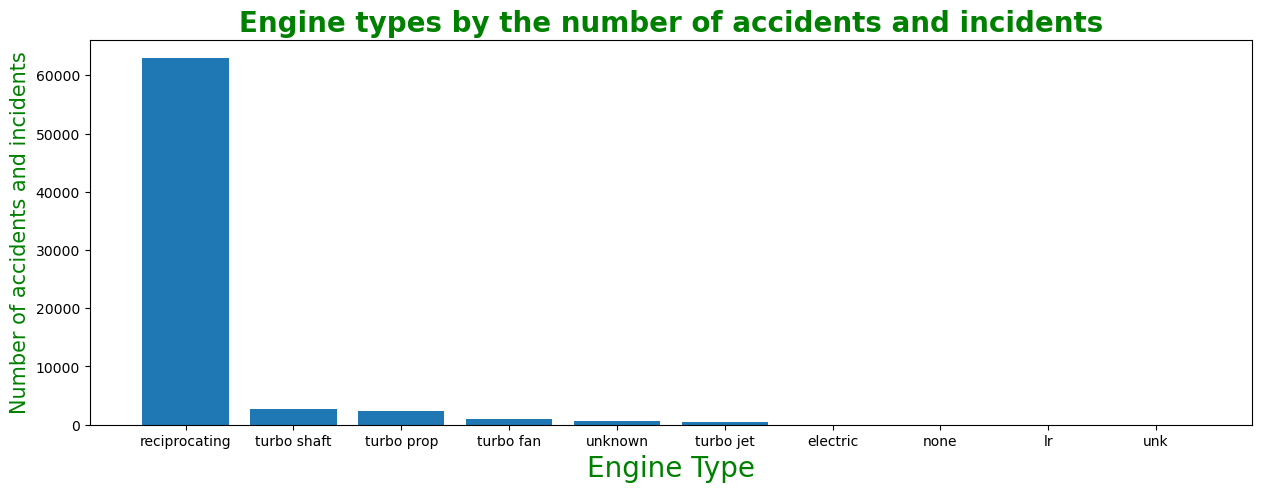

In [47]:
#plotting bar graph of engine type by number of accidents
dim_ET=df['Engine.Type'].value_counts()#defining the series to use
fig, ax=plt.subplots(figsize=(15,5))
ax.bar(dim_ET.index,height=dim_ET.values)#plotting the bar graph
ax.set_xlabel('Engine Type',color='g',fontsize=20)#labeling the x axis
ax.set_ylabel('Number of accidents and incidents',color='g',fontsize=15)#labeling the y axis
ax.set_title('Engine types by the number of accidents and incidents',color='g',fontsize=20,fontweight='bold');#setting the title
print(df['Engine.Type'].value_counts())


From the bar graph above we can see that the aircrafts with reciprocating type of engine had the most number of accidents accounting for more than 75% of the total accidents,followed by turbo shaft,turbo pop,turbo fan,turbo jet,and electric respectively with significantly less ammount of accidents

Number.of.Engines
1.0    61411
2.0     7607
0.0      566
3.0      259
4.0      207
8.0        2
Name: count, dtype: int64


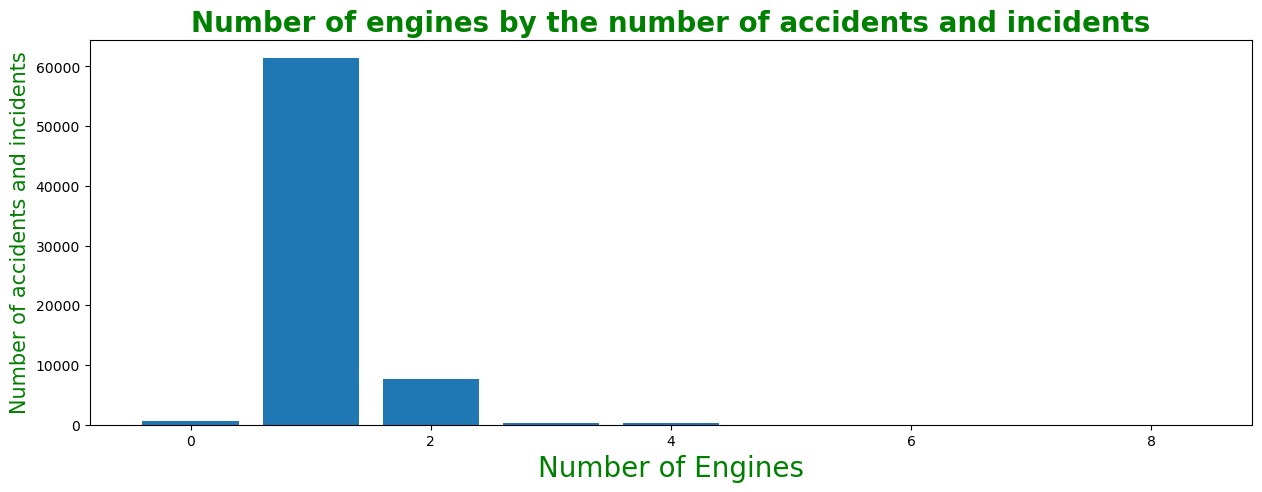

In [48]:
#plotting a bar graph of the number of engines by number of accidents
dim_NE=df['Number.of.Engines'].value_counts()#defining the series to use
fig, ax=plt.subplots(figsize=(15,5))
ax.bar(dim_NE.index,height=dim_NE.values)#ploting the bar graph
ax.set_xlabel('Number of Engines',color='g',fontsize=20)#labeling the x axis
ax.set_ylabel('Number of accidents and incidents',color='g',fontsize=15)#labeling the y axis
ax.set_title('Number of engines by the number of accidents and incidents',color='g',fontsize=20,fontweight='bold');#setting the title
print(df['Number.of.Engines'].value_counts())


from the bar graph above we see that the aircrafts with 1 engine had the most number of accidents accounting for more than half of the total accidents.the ones with 2 engines had also significant large number of accidents compared to the rest.

Weather.Condition
vmc    64879
imc     4549
unk      624
Name: count, dtype: int64


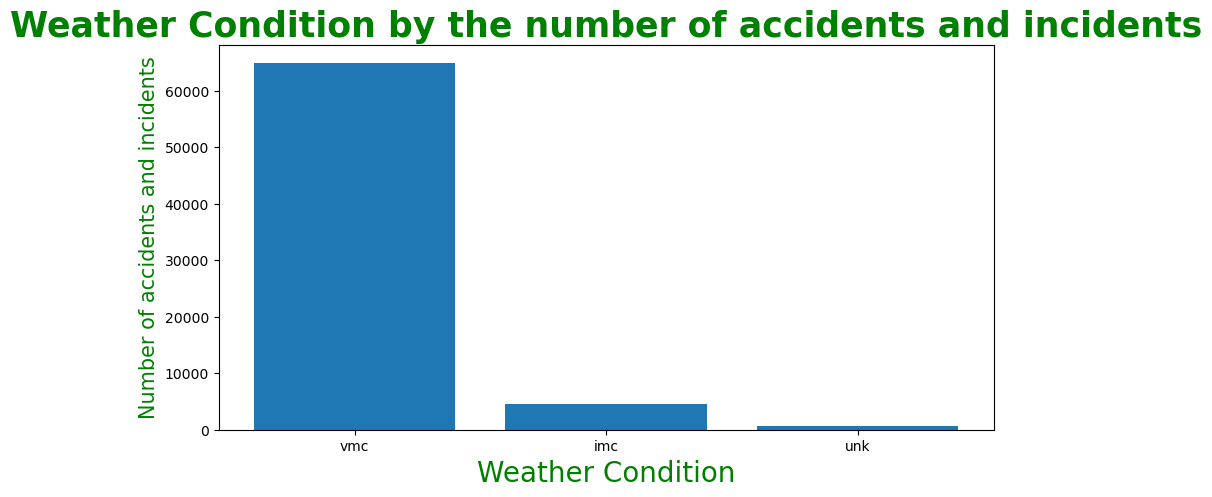

In [49]:
#plotting a bar graph of weather condition by the number of accidents
dim_WC=df['Weather.Condition'].value_counts()#defining the series to use
fig, ax=plt.subplots(figsize=(10,5))
ax.bar(dim_WC.index,height=dim_WC.values)#plotting the bar graph
ax.set_xlabel('Weather Condition',color="g",fontsize=20)#labeling the x axis
ax.set_ylabel('Number of accidents and incidents',color='g',fontsize=15)#labeling the y axis 
ax.set_title('Weather Condition by the number of accidents and incidents',color='g',fontsize=25,fontweight='bold');#setting the title
print(df['Weather.Condition'].value_counts())


Broad.phase.of.flight
landing        30858
takeoff        10931
cruise          8740
maneuvering     6871
approach        5414
taxi            1718
climb           1633
descent         1484
go-around       1199
standing         642
unknown          462
other            100
Name: count, dtype: int64


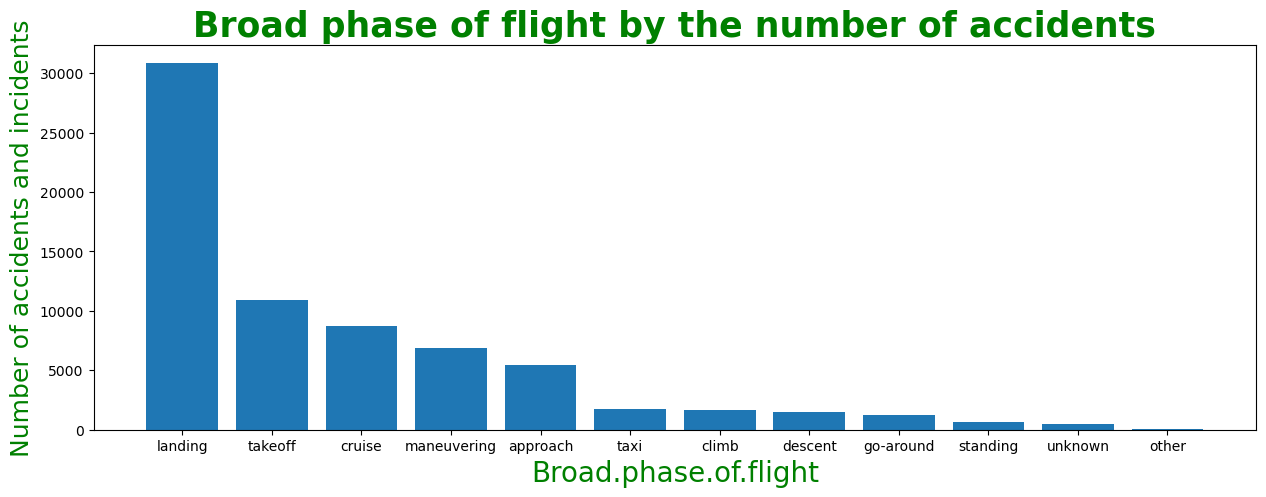

In [23]:
#plotting a bar graph of broad phase of flight by the number of accidents
dim_BF=df['Broad.phase.of.flight'].value_counts()#defining the series to use
fig, ax=plt.subplots(figsize=(15,5))
ax.bar(dim_BF.index,height=dim_BF.values)#plotting the bar graph
ax.set_xlabel('Broad.phase.of.flight',color="g",fontsize=20)#labeling the x axis 
ax.set_ylabel('Number of accidents and incidents',color='g',fontsize=18)#labeling the y axis
ax.set_title('Broad phase of flight by the number of accidents',color='g',fontsize=25,fontweight='bold');#setting the title
print(df['Broad.phase.of.flight'].value_counts())


Aircraft.damage
substantial    54438
destroyed      13967
minor           1641
unknown            6
Name: count, dtype: int64


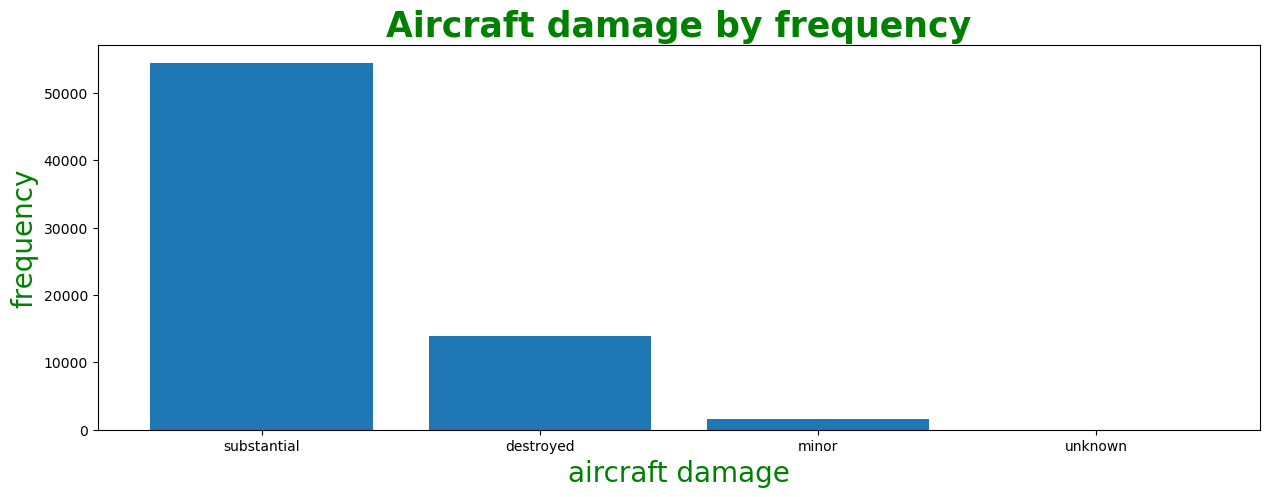

In [24]:
#plotting a bar graph of aircraft damage by frequency
dim_AD=df['Aircraft.damage'].value_counts()#defining the series to use
fig, ax=plt.subplots(figsize=(15,5))
ax.bar(dim_AD.index,height=dim_AD.values)#plotting the bar graph
ax.set_xlabel('aircraft damage',color="g",fontsize=20)#labeling the x axis
ax.set_ylabel('frequency',color='g',fontsize=20)#labeling the y axis
ax.set_title('Aircraft damage by frequency',color='g',fontsize=25,fontweight='bold');#setting the title
print(df['Aircraft.damage'].value_counts())


from the bar graph we see tha most of the aircrafts involved in the accident or incident had a substantial damage followed by those who were destroyed and those with minor damages respectively with significantly less numbers

C:\Users\HomePC\AppData\Local\Temp\ipykernel_13588\4129096057.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_makes.index,rotation=90);


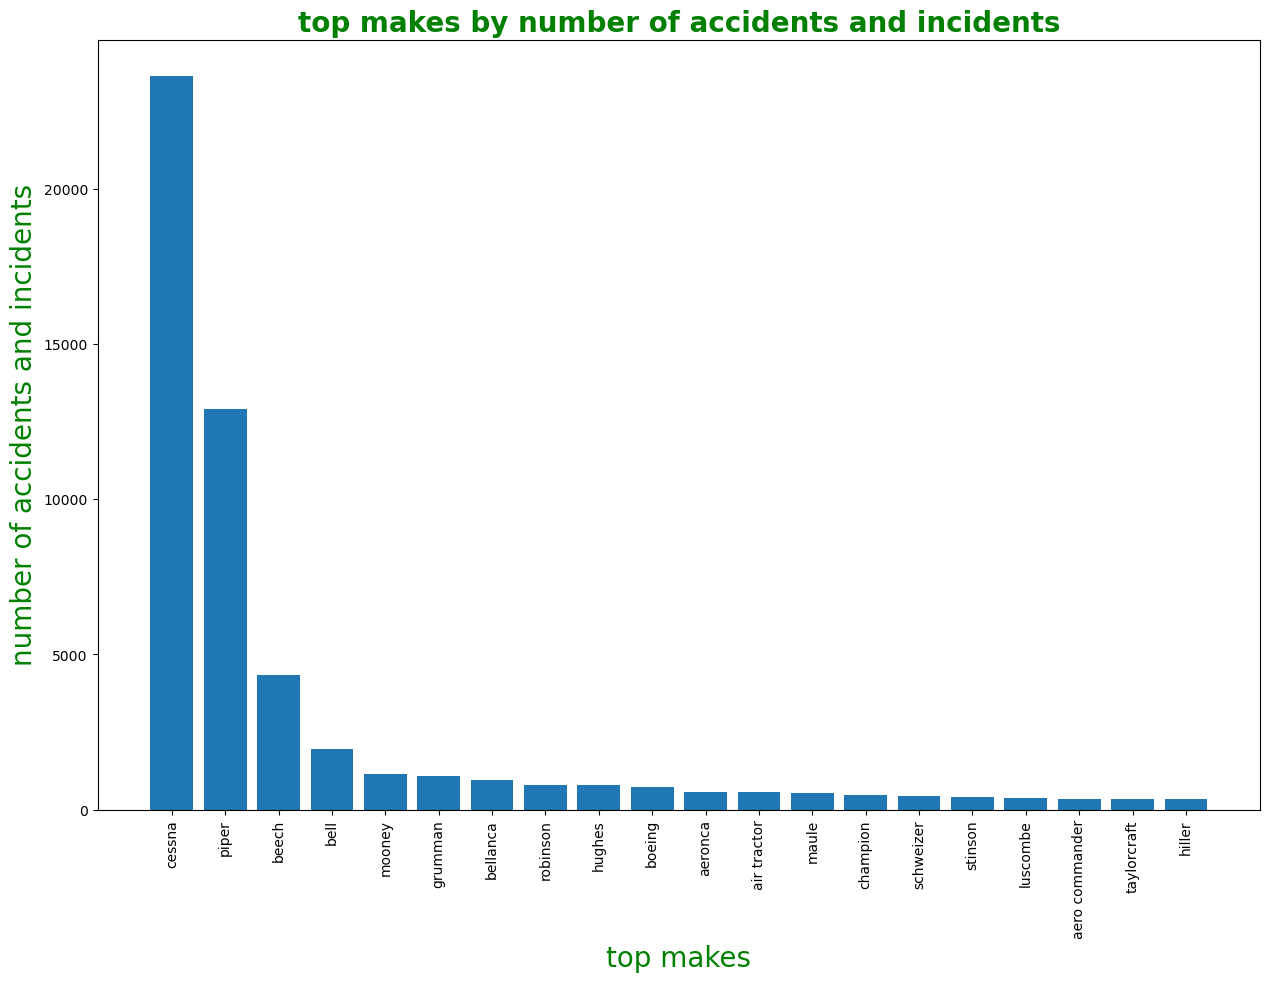

In [50]:
top_makes=df['Make'].value_counts()[:20]#defining the series to use 
fig, ax=plt.subplots(figsize=(15,10))
ax.bar(x=top_makes.index,height=top_makes.values)#plotting the bar graph
ax.set_title('top makes by number of accidents and incidents',color='g',fontsize=20,fontweight='bold')#setting the title
ax.set_xlabel('top makes',color='g',fontsize=20)#labeling the x axis
ax.set_ylabel('number of accidents and incidents',color='g',fontsize=20)#labeling the y axis
ax.set_xticklabels(top_makes.index,rotation=90);



## 3.4 viewing the 

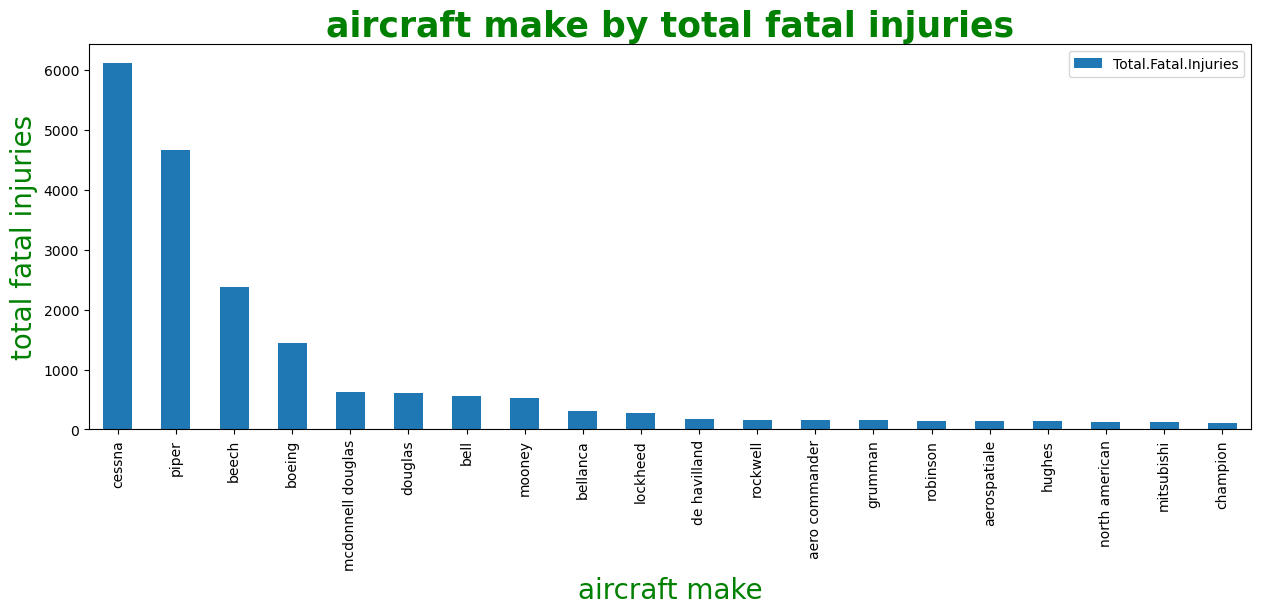

In [26]:
#grouping by 'make' column and aggregating total fatal injuries and then plotting a bar graph
df.groupby('Make')['Total.Fatal.Injuries'].sum().sort_values(ascending=False)[:20].plot(kind='bar',figsize=(15,5))
plt.title('aircraft make by total fatal injuries',color='g',fontsize=25,fontweight='bold')#setting the title
plt.xlabel('aircraft make',color='g',fontsize=20)#labeling the x axis
plt.ylabel('total fatal injuries',color='g',fontsize=20)#labeling the y axis
plt.legend();



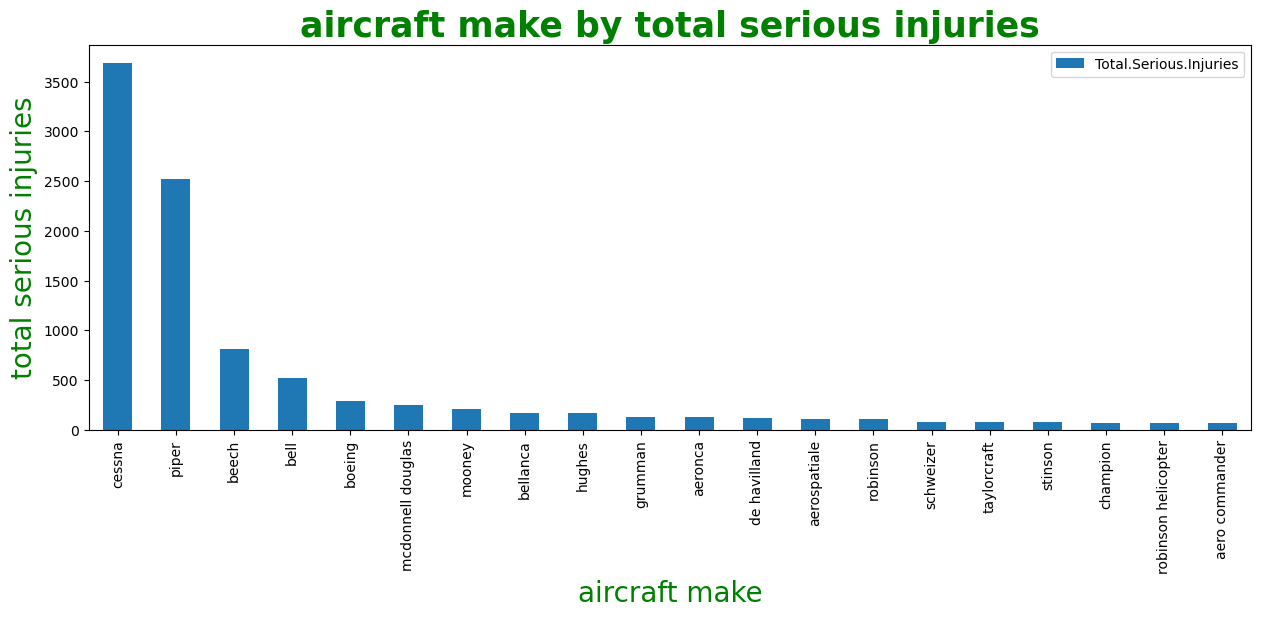

In [27]:
#grouping by 'make' column and aggregating total fatal injuries and then plotting a bar graph
df.groupby('Make')['Total.Serious.Injuries'].sum().sort_values(ascending=False)[:20].plot(kind='bar',figsize=(15,5))
plt.title('aircraft make by total serious injuries',color='g',fontsize=25,fontweight='bold')#setting the title
plt.xlabel('aircraft make',color='g',fontsize=20)#labeling the x axis
plt.ylabel('total serious injuries',color='g',fontsize=20)#labelin y axis
plt.legend();



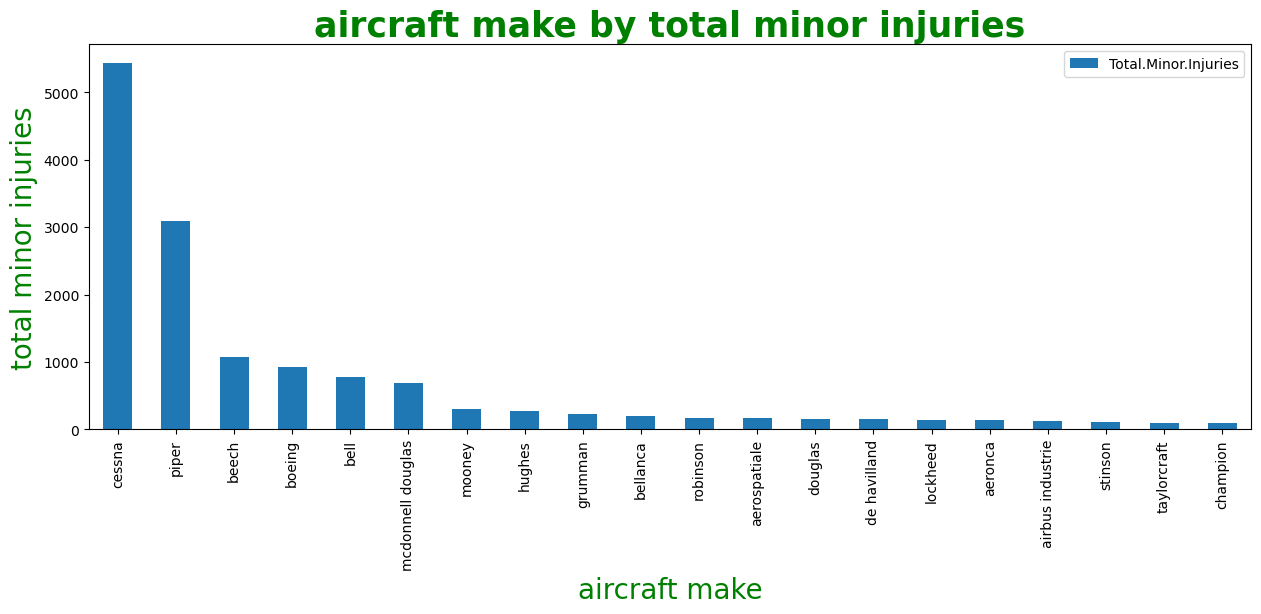

In [28]:
#grouping by 'make' column and aggregating total fatal injuries and then plotting a bar graph
df.groupby('Make')['Total.Minor.Injuries'].sum().sort_values(ascending=False)[:20].plot(kind='bar',figsize=(15,5))
plt.title('aircraft make by total minor injuries',color='g',fontsize=25,fontweight='bold')#setting the title
plt.xlabel('aircraft make',color='g',fontsize=20)#labeling the x axis 
plt.ylabel('total minor injuries',color='g',fontsize=20)#labeling the y axis 
plt.legend();



 ## 3.5 line plot of accidents by time

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


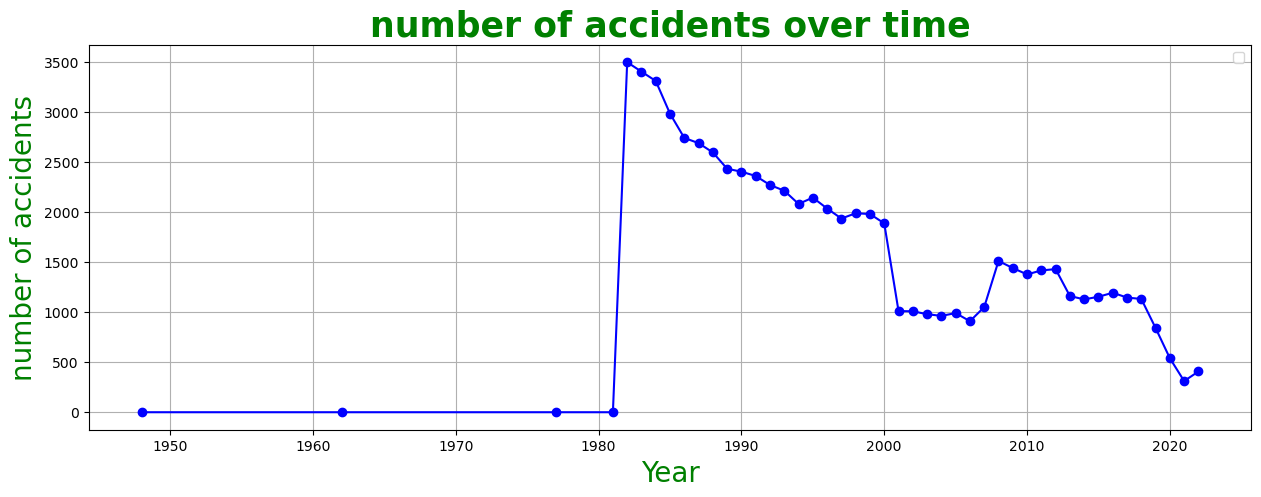

In [78]:
value=df['Event.Year'].value_counts().sort_index()#defining the series to use
plt.figure(figsize=(15,5))
plt.plot(list(value.index),list(value.values),marker='o',linestyle='-',color='b')#ploting the lineplot
plt.title('number of accidents over time',color='g',fontsize=25,fontweight='bold')# setting the title
plt.xlabel('Year',color='g',fontsize=20)#labeling the x axis
plt.ylabel('number of accidents',color='g',fontsize=20)#labeling the y axis
plt.grid(True)#adding a grid
plt.legend()
plt.show()
